In [1]:
#Llamar al dataloader
%run DataLoader.ipynb

In [2]:

top_loc = list(dataset.groupby('location').agg({'target':'count'}).nlargest(20, 'target').reset_index().location)
top_loc

['USA',
 'New York',
 'United States',
 'London',
 'Canada',
 'Nigeria',
 'UK',
 'Los Angeles, CA',
 'India',
 'Mumbai',
 'Washington, DC',
 'Kenya',
 'Worldwide',
 'Australia',
 'Chicago, IL',
 'California',
 'California, USA',
 'Everywhere',
 'New York, NY',
 'Florida']

In [3]:
top_keywords = list(dataset.groupby('keyword').agg({'target':'count'}).nlargest(20, 'target').reset_index().keyword)
top_keywords

['fatalities',
 'armageddon',
 'deluge',
 'body%20bags',
 'damage',
 'harm',
 'sinking',
 'collided',
 'evacuate',
 'fear',
 'outbreak',
 'siren',
 'twister',
 'windstorm',
 'collision',
 'derailment',
 'earthquake',
 'explosion',
 'famine',
 'flames']

In [5]:
filtered = dataset.loc[(dataset['keyword'].isin(top_keywords)) & (dataset['location'].isin(top_loc)),:]
filtered

,keyword,location,text,target,longitud
id,,,,,
457,armageddon,Canada,@ENews Ben Affleck......I know there's a wife/...,False,132
461,armageddon,USA,YOUR PHONE IS SPYING ON YOU! Hidden Back Door ...,False,125
472,armageddon,Worldwide,God's Kingdom (Heavenly Gov't) will rule over ...,False,135
477,armageddon,California,Check out #PREPPERS #DOOMSDAY MUST HAVE LIBRAR...,False,139
1520,body%20bags,"California, USA",Womens Handbags Cross Body Geometric Pattern S...,False,138
...,...,...,...,...,...
8781,siren,"California, USA",Can you save\nCan you save my\nCan you save my...,False,60
8784,siren,Everywhere,@LA_Siren Thanks for joining the foot. @VVorm,False,45
10011,twister,Everywhere,Just stop fucking saying ÛÏa whole Û÷nother...,False,148


In [7]:
grouped = filtered.groupby(['keyword', 'location']).agg({'target':'count'}).reset_index()
grouped.columns = ['keyword', 'location', 'Cantidad']
grouped.dropna(inplace=True)
grouped

,keyword,location,Cantidad
0,armageddon,California,1
1,armageddon,Canada,1
2,armageddon,USA,1
3,armageddon,Worldwide,1
4,body%20bags,"California, USA",1
5,collided,Mumbai,1
6,collision,"Los Angeles, CA",2
7,collision,Mumbai,1
8,damage,Australia,1
9,deluge,Australia,1


In [8]:
heatmap_data = pd.pivot_table(grouped, values='Cantidad', 
                     index=['keyword'], 
                     columns='location')
heatmap_data = heatmap_data.fillna(0)
heatmap_data

location,Australia,California,"California, USA",Canada,"Chicago, IL",Everywhere,Florida,India,London,"Los Angeles, CA",Mumbai,New York,"New York, NY",UK,USA,United States,"Washington, DC",Worldwide
keyword,,,,,,,,,,,,,,,,,,
armageddon,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
body%20bags,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
collided,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
collision,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
damage,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
deluge,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
derailment,0.0,0.0,0.0,0.0,2.0,0.0,0.0,7.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
earthquake,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
evacuate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


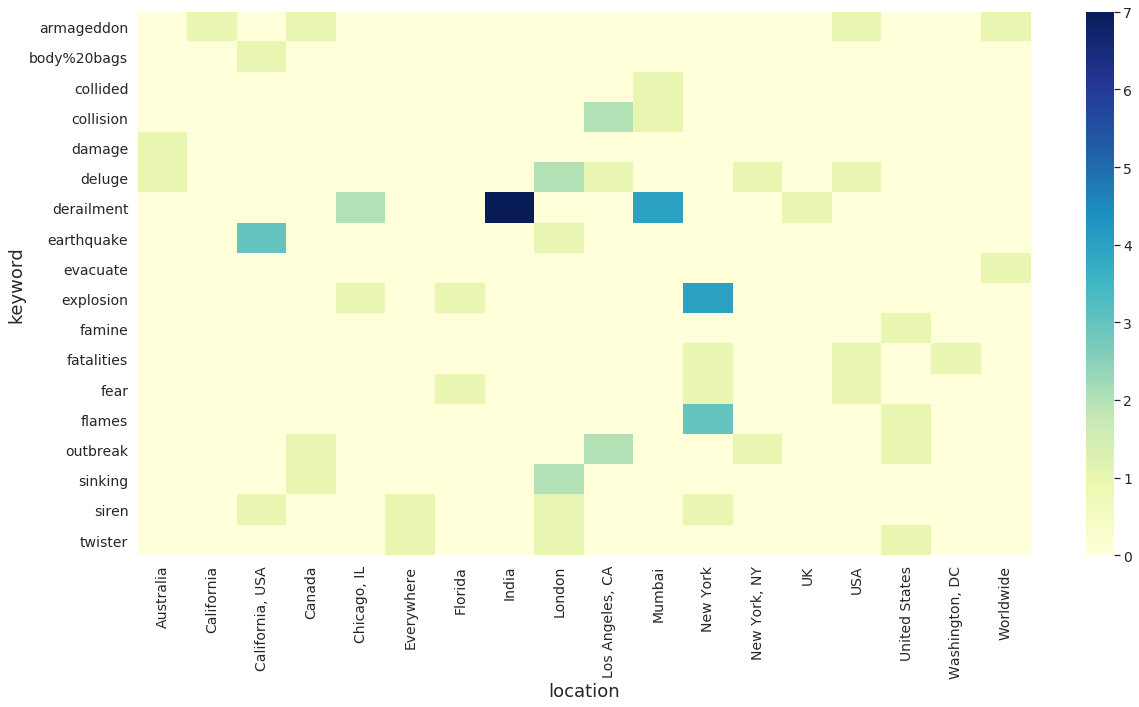

In [9]:
sns.heatmap(heatmap_data, cmap="YlGnBu")

In [13]:
grouped1 = dataset.groupby(['keyword', 'location']).agg({'target':'count'}).reset_index().nlargest(50,'target')
grouped1.columns = ['keyword', 'location', 'Cantidad']
grouped1.dropna(inplace=True)
grouped1

,keyword,location,Cantidad
3628,sandstorm,USA,17
2951,loud%20bang,Kenya,16
2436,flood,New York,13
241,arsonist,ss,10
569,body%20bag,New York,10
4623,wreckage,Mumbai,10
52,aftershock,304,9
3925,suicide%20bomb,Nigeria,9
1526,derailment,India,7
1613,destroyed,USA,7


In [16]:
heatmap_data1 = pd.pivot_table(grouped1, values='Cantidad', 
                     index=['keyword'], 
                     columns='location')
heatmap_data1 = heatmap_data1.fillna(0)
heatmap_data1

location,Road to the Billionaires Club,#FLIGHTCITY UK,304,"Adelaide, Australia",Atlanta Georgia,"Atlanta, GA","Bend, Oregon",Buy Give Me My Money,CA via Brum,"California, USA",...,Sacramento,"Seattle, Washington",Switzerland,USA,United States,"Washington, DC",World Wide,Worldwide,in the Word of God,ss
keyword,,,,,,,,,,,,,,,,,,,,,
aftershock,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ambulance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
armageddon,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
army,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
arsonist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
avalanche,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bioterror,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
blight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
body%20bag,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1, 'Relación entre keyword y location')

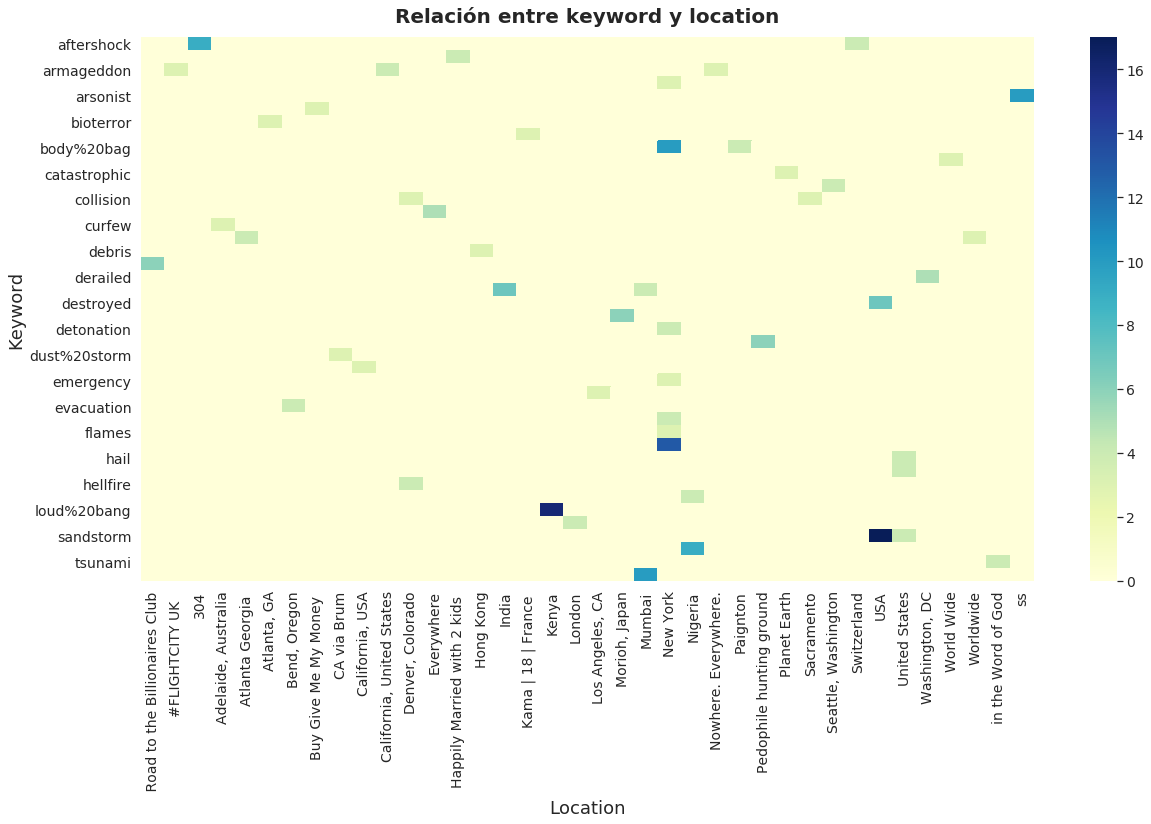

In [19]:
sns.heatmap(heatmap_data1, cmap="YlGnBu")

plt.ylabel('Keyword')
plt.xlabel("Location")
plt.title('Relación entre keyword y location', pad = 15)